In [1]:
import pandas as pd

df_train = pd.read_csv('.\\data\\00878.TW_train.csv', index_col='Date')
df_test = pd.read_csv('.\\data\\00878.TW_test.csv', index_col='Date')

print(df_train.head())
print(df_test.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  16.100000  16.230000  16.100000  16.200001  13.214672  11092940
2021-01-05  16.200001  16.219999  16.110001  16.209999  13.222827  14381492
2021-01-06  16.240000  16.309999  16.020000  16.100000  13.133098  14235562
2021-01-07  16.180000  16.260000  16.170000  16.240000  13.247300  11817045
2021-01-08  16.320000  16.500000  16.299999  16.500000  13.459386  15334676
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-02-01  16.950001  17.000000  16.889999  17.000000  15.653216   45108058
2023-02-02  17.129999  17.129999  17.000000  17.120001  15.763712   91868014
2023-02-03  17.129999  17.129999  17.030001  17.100000  15.745295   79318893
2023-02-06  17.090000  17.110001  17.030001  17.049999  15.699254  127077569
2023-0

In [2]:
# 清除缺失值
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [3]:
X_train_set = df_train['Adj Close'].values
X_test_set = df_test['Adj Close'].values

print(X_train_set[:10])
print(X_test_set[:10])

[13.214672 13.222827 13.133098 13.2473   13.459386 13.59806  13.508329
 13.761205 13.867245 13.761205]
[15.653216 15.763712 15.745295 15.699254 15.708462 15.791333 15.754501
 15.708462 15.763712 15.874201]


In [7]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_train_set = sc.fit_transform(X_train_set.reshape(-1, 1))
X_test_set = sc.fit_transform(X_test_set.reshape(-1, 1))

print(X_train_set[:10])
print(X_test_set[:10])

In [8]:
import numpy as np

# 訓練集

train_days = 60

X_train_data, Y_train_data = [], []

for i in range(len(X_train_set) - train_days - 1):
    X_train_data.append(X_train_set[i:i + train_days])
    Y_train_data.append(X_train_set[i + train_days + 1])

X_train_data = np.array(X_train_data)
Y_train_data = np.array(Y_train_data)

print(f'X_train_data shape: {X_train_data.shape}')
print(f'Y_train_data shape: {Y_train_data.shape}')

# 測試集

X_test_data, Y_test_data = [], []

for i in range(len(X_test_set) - train_days - 1):
    X_test_data.append(X_test_set[i:i + train_days])
    Y_test_data.append(X_test_set[i + train_days + 1])

X_test_data = np.array(X_test_data)
Y_test_data = np.array(Y_test_data)

print(f'X_test_data shape: {X_test_data.shape}')
print(f'Y_test_data shape: {Y_test_data.shape}')

X_train_data shape: (428, 60, 1)
Y_train_data shape: (428, 1)
X_test_data shape: (187, 60, 1)
Y_test_data shape: (187, 1)


In [9]:
print(X_train_data[0])
print(Y_train_data[0])
print('-' * 70)
print(X_train_data[1])
print(Y_train_data[1])

[[0.02101029]
 [0.02311071]
 [0.        ]
 [0.029414  ]
 [0.08403912]
 [0.11975615]
 [0.09664493]
 [0.16177597]
 [0.18908775]
 [0.16177597]
 [0.12605893]
 [0.13866475]
 [0.06302934]
 [0.08403912]
 [0.11555353]
 [0.15547267]
 [0.12185708]
 [0.14916938]
 [0.10925126]
 [0.05462563]
 [0.07353448]
 [0.10714956]
 [0.11975615]
 [0.10925126]
 [0.13446186]
 [0.17438152]
 [0.18698786]
 [0.19959264]
 [0.24161271]
 [0.27942965]
 [0.26682409]
 [0.3113286 ]
 [0.24987038]
 [0.23715433]
 [0.27106277]
 [0.24139301]
 [0.22019985]
 [0.22443854]
 [0.24987038]
 [0.25410881]
 [0.30285174]
 [0.32616463]
 [0.34735728]
 [0.35795309]
 [0.34735728]
 [0.37278835]
 [0.36219177]
 [0.37702652]
 [0.38974309]
 [0.38550441]
 [0.4003389 ]
 [0.43000943]
 [0.47663341]
 [0.52749556]
 [0.51477976]
 [0.52113766]
 [0.54444978]
 [0.55504584]
 [0.54021109]
 [0.55080767]]
[0.52325713]
----------------------------------------------------------------------
[[0.02311071]
 [0.        ]
 [0.029414  ]
 [0.08403912]
 [0.11975615]
 [0.0

In [10]:
import tensorflow as tf

# gpu
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_data.shape[1],)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss="mae", optimizer="adam")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-traina

In [12]:
history = model.fit(X_train_data, Y_train_data, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
14/14 - 1s - loss: 0.1765 - 1s/epoch - 93ms/step
Epoch 2/100
14/14 - 0s - loss: 0.0710 - 51ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 0.0601 - 57ms/epoch - 4ms/step
Epoch 4/100
14/14 - 0s - loss: 0.0536 - 58ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 0.0563 - 65ms/epoch - 5ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0569 - 50ms/epoch - 4ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0513 - 56ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 0.0532 - 60ms/epoch - 4ms/step
Epoch 9/100
14/14 - 0s - loss: 0.0594 - 60ms/epoch - 4ms/step
Epoch 10/100
14/14 - 0s - loss: 0.0516 - 51ms/epoch - 4ms/step
Epoch 11/100
14/14 - 0s - loss: 0.0553 - 49ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 0.0476 - 52ms/epoch - 4ms/step
Epoch 13/100
14/14 - 0s - loss: 0.0453 - 46ms/epoch - 3ms/step
Epoch 14/100
14/14 - 0s - loss: 0.0431 - 45ms/epoch - 3ms/step
Epoch 15/100
14/14 - 0s - loss: 0.0423 - 52ms/epoch - 4ms/step
Epoch 16/100
14/14 - 0s - loss: 0.0437 - 62ms/epoch - 4ms/step
Ep

In [21]:
X_test_data_pred = model.predict(X_test_data)
Y_test_data_pred_price = Y_test_data

6/6 [==============================] - 0s 2ms/step


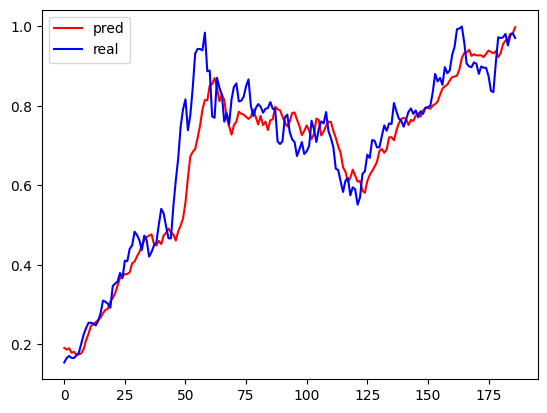

In [45]:
import matplotlib.pyplot as plt

plt.plot(X_test_data_pred, color="red", label="pred")
plt.plot(Y_test_data_pred_price, color="blue", label="real")
plt.legend()
plt.show()

In [54]:
# LSTM
from keras.models import Sequential
from keras.layers import LSTM

LSTM_model = Sequential()
LSTM_model.add(LSTM(128, activation='relu', input_shape=(X_train_data.shape[1], Y_train_data.shape[1]), return_sequences=True))
LSTM_model.add(LSTM(64, activation='relu', return_sequences=False))
LSTM_model.add(Dense(32, activation='relu'))
LSTM_model.add(Dense(16, activation='relu'))
LSTM_model.add(Dense(1, activation='relu'))
LSTM_model.summary()
LSTM_model.compile(loss="mae", optimizer="adam")

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 60, 128)           66560     
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________


In [57]:
LSTM_history = LSTM_model.fit(X_train_data, Y_train_data, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
7/7 - 2s - loss: 0.0600 - 2s/epoch - 216ms/step
Epoch 2/10
7/7 - 2s - loss: 0.0593 - 2s/epoch - 240ms/step
Epoch 3/10
7/7 - 2s - loss: 0.0575 - 2s/epoch - 235ms/step
Epoch 4/10
7/7 - 1s - loss: 0.0595 - 1s/epoch - 211ms/step
Epoch 5/10
7/7 - 2s - loss: 0.0585 - 2s/epoch - 223ms/step
Epoch 6/10
7/7 - 2s - loss: 0.0602 - 2s/epoch - 222ms/step
Epoch 7/10
7/7 - 2s - loss: 0.0557 - 2s/epoch - 220ms/step
Epoch 8/10
7/7 - 1s - loss: 0.0553 - 1s/epoch - 210ms/step
Epoch 9/10
7/7 - 2s - loss: 0.0556 - 2s/epoch - 226ms/step
Epoch 10/10
7/7 - 1s - loss: 0.0548 - 1s/epoch - 209ms/step


In [ ]:
X_test_data_pred = LSTM_model.predict(X_test_data)
Y_test_data_pred_price = Y_test_data

In [ ]:
plt.plot(X_test_data_pred, color="red", label="pred")
plt.plot(Y_test_data_pred_price, color="blue", label="real")
plt.legend()
plt.show()